In [548]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import defaultdict
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from math import sqrt
from sklearn.metrics import mean_squared_error
sns.set_style("whitegrid")

data = pd.read_csv(r'C:/Users/Shivam/Desktop/ml_prg/cancer dataset.csv')
data.drop('Unnamed: 32',axis=1,inplace=True)

data = pd.read_csv(r'C:/Users/Shivam/Desktop/dl/Mushrooms.csv',header=None)

In [559]:
data = pd.read_csv(r'C:/Users/Shivam/Desktop/ml_prg/dataset/pima-indians-diabetes.csv',header=None)

In [560]:
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [561]:
def preprocessing(data):
    train = data.drop(8,axis=1)
    target = data[[8]]
    target = target.apply(LabelEncoder().fit_transform)
    train = train.apply(LabelEncoder().fit_transform)
    return train,target

In [562]:
class allSubset:
    def __init__(self,train,target,k):
        features = train.columns.tolist()
        self.sub_features = sample(features,k)
        self.xtrain, self.xtest, self.ytrain, self.ytest = train_test_split(train[self.sub_features],
                                                                            target,test_size=0.3,random_state=0)
        
    def model(self):
        feature_wise_acc = defaultdict(list)
        feature_wise_rmse = defaultdict(list)
        for i in range(1,len(self.sub_features)+1):
            sf = list(combinations(self.sub_features,i))
            for j in range(len(sf)):
                logistic = LogisticRegression()
                xtrain = self.xtrain[list(sf[j])]
                ytrain = self.ytrain
                logistic.fit(xtrain,ytrain)
                predict = logistic.predict(xtrain)
                feature_wise_rmse[i].append(sqrt(mean_squared_error(predict,ytrain)))
                feature_wise_acc[i].append(logistic.score(xtrain,ytrain))
        return feature_wise_acc,feature_wise_rmse,xtrain.columns

In [572]:
train,target = preprocessing(data)

In [574]:
asub = allSubset(train,target,8)

In [575]:
feature_wise_acc,feature_wise_rmse,sub_features = asub.model()

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

In [576]:
print("Number of features : ",feature_wise_acc.keys())
print("List of features : ",sub_features.values)

Number of features :  dict_keys([1, 2, 3, 4, 5, 6, 7, 8])
List of features :  [3 2 1 4 7 6 5 0]


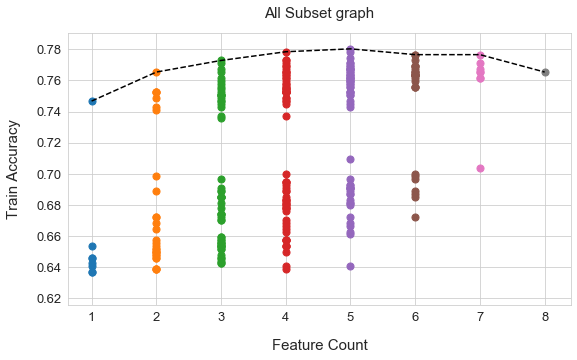

In [577]:
max_acc = [max(feature_wise_acc[j]) for j in range(1,len(sub_features)+1)]    
plt.figure(figsize=(9,5))
for i in range(1,len(sub_features)+1):
    plt.scatter([i]*len(feature_wise_acc[i]),feature_wise_acc[i],s=50)
plt.plot(range(1,len(sub_features)+1),max_acc,c='black',linestyle='--')

plt.xlabel("Feature Count",fontsize=15,labelpad=15)
plt.ylabel("Train Accuracy",fontsize=15,labelpad=15)
plt.title("All Subset graph",fontsize=15,pad=15)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

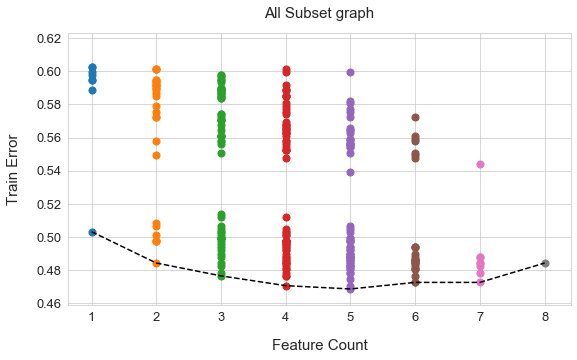

In [578]:
min_error = [min(feature_wise_rmse[j]) for j in range(1,len(sub_features)+1)]    
plt.figure(figsize=(9,5))
for i in range(1,len(sub_features)+1):
    plt.scatter([i]*len(feature_wise_rmse[i]),feature_wise_rmse[i],s=50)
plt.plot(range(1,len(sub_features)+1),min_error,c='black',linestyle='--')

plt.xlabel("Feature Count",fontsize=15,labelpad=15)
plt.ylabel("Train Error",fontsize=15,labelpad=15)
plt.title("All Subset graph",fontsize=15,pad=15)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

#### Validation :  Observing these graph we could say that as we increase the number of features as input for our model, training error reduces, which itself validates the concept that more and more features does make our model more flexible i.e. it is able to explain the data very well.